In [5]:
import keras
import numpy as np
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
from PIL import Image #The PIL library is used to open image content into an array.
import os #With the help of the OS module, we iterate over all the classes and append images and 
          #their respective labels in the data and labels list.
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [18]:
from keras import models

## Dataset

https://www.uni-ulm.de/in/iui-drive-u/projekte/driveu-traffic-light-dataset/

## Import the images

In [6]:
#create empty lists to store the data
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [7]:
#Get the images from the directory

for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    
    
    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("error loading image")
            
data = np.array(data)
labels = np.array(labels)

In [10]:
data.shape # 78418 images of 30x30 and RGB coding (that is the 3 (of 3 colors))

(78418, 30, 30, 3)

In [14]:
data

array([[[[ 75,  78,  80],
         [ 74,  76,  78],
         [ 85,  86,  84],
         ...,
         [ 68,  75,  74],
         [ 65,  69,  68],
         [ 66,  67,  66]],

        [[ 83,  84,  86],
         [ 80,  80,  82],
         [ 88,  88,  83],
         ...,
         [ 73,  77,  78],
         [ 76,  78,  75],
         [ 80,  80,  78]],

        [[ 78,  78,  80],
         [ 86,  85,  86],
         [ 90,  89,  90],
         ...,
         [ 71,  74,  71],
         [ 73,  74,  69],
         [ 78,  78,  74]],

        ...,

        [[133, 134, 139],
         [123, 127, 132],
         [112, 121, 125],
         ...,
         [ 94,  95,  89],
         [ 97,  98,  91],
         [ 99, 103,  99]],

        [[ 91,  95,  99],
         [ 91,  98, 103],
         [ 75,  86,  90],
         ...,
         [104, 102,  96],
         [110, 113, 104],
         [ 96, 104,  98]],

        [[ 85,  84,  87],
         [ 95, 101, 107],
         [ 63,  76,  81],
         ...,
         [103, 103,  95],
        

In [15]:
labels

array([ 0,  0,  0, ..., 42, 42, 42])

In [11]:
labels.shape

(78418,)

## divide the data set

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size= 0.2, random_state= 42)

In [13]:
#You can’t feed an array of integers into a neural network. the labels are just one dimention
#We have to turn the labels into tensors (multidimentional arrays) 
#A way of doing this is with one-hot-encoding to transform the values to 0 and 1s.

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [17]:
y_train.shape

(62734, 43)

## Build a CNN model

> ```To classify the images into their respective categories, we will build a CNN model (Convolutional Neural Network). CNN is best for image classification purposes.```

In [23]:
#use relu as the default activation function
#loss is going to be 'categorical_crossentropy' because we have many classes to categorize

model = models.Sequential()
model.add(Conv2D(filters = 32, kernel_size=(5,5), activation = 'relu', input_shape = X_train.shape[1:]))
model.add(Conv2D(filters = 32, kernel_size=(5,5), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2))) #
model.add(Dropout(rate = 0.25)) #he dropout rate is the fraction of the features that are zeroed out.
                                #done so the overfitting is reduces due to the model not learning specifics pattern
model.add(Conv2D(filters = 64, kernel_size= (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())#
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [24]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
#we need a validation set to not commit data leaking
history = model.fit(X_train, y_train, batch_size=64, epochs= 15, validation_split= 0.2)

Epoch 1/15
981/981 [==============================] - 102s 103ms/step - loss: 3.0111 - accuracy: 0.3470 - val_loss: 0.4277 - val_accuracy: 0.8856
Epoch 2/15
981/981 [==============================] - 102s 104ms/step - loss: 0.7614 - accuracy: 0.7709 - val_loss: 0.2302 - val_accuracy: 0.9329
Epoch 3/15
981/981 [==============================] - 100s 102ms/step - loss: 0.4968 - accuracy: 0.8490 - val_loss: 0.1771 - val_accuracy: 0.9469
Epoch 4/15
981/981 [==============================] - 98s 100ms/step - loss: 0.3562 - accuracy: 0.8942 - val_loss: 0.0963 - val_accuracy: 0.9728
Epoch 5/15
981/981 [==============================] - 97s 98ms/step - loss: 0.2825 - accuracy: 0.9136 - val_loss: 0.0791 - val_accuracy: 0.9769
Epoch 6/15
981/981 [==============================] - 99s 101ms/step - loss: 0.2558 - accuracy: 0.9236 - val_loss: 0.0678 - val_accuracy: 0.9797
Epoch 7/15
981/981 [==============================] - 100s 102ms/step - loss: 0.2181 - accuracy: 0.9352 - val_loss: 0.0539 - val

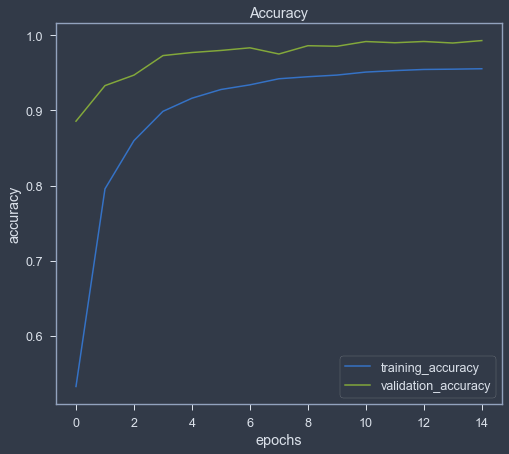

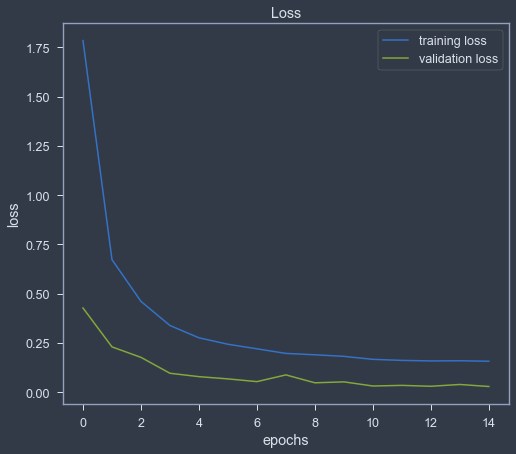

In [27]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label= 'validation_accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Test the accuracy of the model

In [31]:
from sklearn.metrics import accuracy_score

y_test = pd.read_csv(r'C:\Users\MSI\Desktop\Data Science\Python\Projects\Traffic lights classification\Test_1.csv')

labels = y_test["ClassId"].values
imgs = y_test['Path'].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test = np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data

from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

C:\Users\MSI\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9472684085510689

## Save the model 

In [32]:
model.save('traffic_lights.h5')